<a href="https://colab.research.google.com/github/Joao-vitor1/training-CNNs/blob/main/MNIST_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install torchmetrics

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# baixando bibliotecas e dados

Downloading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import Dataset
from torchvision import transforms
import torchmetrics
from torch import nn
from torch.optim.lr_scheduler import StepLR

import tempfile
import os
# import torch.nn as nn



In [ ]:
#dowloading data as a pandas table
sample = pd.read_csv('/content/gdrive/MyDrive/MNIST/sample_submission.csv')
test = pd.read_csv('/content/gdrive/MyDrive/MNIST/test.csv')
train = pd.read_csv('/content/gdrive/MyDrive/MNIST/train.csv')

O kaggle nos fornece 3 tabelas para nosso projeto. A primeira tabela é a de treino, onde a primeira coluna dessa tabela representa nossa variável dependente, o valor de cada numero do nosso banco de dados. Os valores sequintes de cada linha representam um valor de píxel da imagem, que vai de 0 á 1. A tabela tem 42 mil linhas, logo temos 42 mil imagens disponíveis para treino.

A tabela com os dados de teste funciona da mesma forma, com cada linha representando os valores de píxel de uma imagem. Só que nela não nos é dada a mesma primeira coluna da tabela de treino, que diz respeito ao valor de cada imagem, sendo nossa tarefa tentar predizer quais são esse valores.

A terceira tabela é apenas um modelo para quando formos submeter nossas predições.

-----------------------------------------------------------

The Kaggle provides us with 3 tables for our project. The first table is for training. Here, the first value of each row in this table represents our targets, which is the value of each number in our dataset. The next values of each row represent one image's pixel value, that can go from 0 to 1. Thus, the table have 42 thousand rows, which means it has 42 thousand images available for training.

The table with the test data works in the same way, with each row representing the pixel values of an image. but it doesn't give us the first column which concerns the value of each image. It is our task to try to predict what these values are.

The third table is just a template for when we submit our predictions.


In [ ]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# visualizando dados
Viewing data

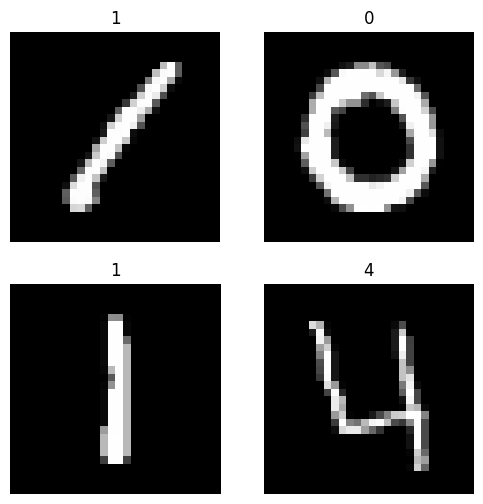

In [ ]:
figure = plt.figure(figsize=(6,6))
rows,cols = 2,2

for i in range(4):
  #image's size 28x28
  img = np.array(train.iloc[i][1:]).reshape(28,28)
  label = train.iloc[i][0]

  #postition of each image
  figure.add_subplot(rows, cols, i+1)
  plt.axis('off')
  plt.title(label)
  plt.imshow(img, cmap = 'gray')
plt.show()


# gerando batchs copia

In [ ]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms
import torchmetrics

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# from torch.utils.data import SubsetRandomSampler
# from torchvision import datasets
# transform = transforms.Compose([
#                                 T.RandomRotation(10),
#                                 transforms.ToTensor(),
#                                 transforms.Normalize((0.5,), (0.5,))
#                                ])


# # Create training set and define training dataloader and validation dataloader
# train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)

# indices_list = list(range(len(train_data)))
# np.random.shuffle(indices_list)
# split_index = int(0.9 * len(indices_list))
# train_index = indices_list[: split_index]
# valid_index = indices_list[split_index: ]

# train_sampler = SubsetRandomSampler(train_index)
# valid_sampler = SubsetRandomSampler(valid_index)

# train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, sampler=train_sampler)
# valid_loader = torch.utils.data.DataLoader(train_data, batch_size=128, sampler=valid_sampler)




# # Create test set and define test dataloader
# test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=128, shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 140988142.09it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 93253036.05it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41369172.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24935247.08it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



# Gerando batchs
Creating batchs

Agora que já temos acesso aos dados, vamos converte-los á um formato ao qual nossos modelos possam trabalhar. Para tal tarefa aplicamos uma série de etapas de pré-processamento através da função `transform`, onde convertemos os dados para tensores e os normalizamos.

A função `transform` é aplicada em cada linha das nossas tabelas, ao qual representa uma imagem, através de um interador `for`. Depois a imagem é adicionada ao dataset junto ao label, caso estejamos lidando com os dados de treino e validação, se não, adicionamos apenas as imagens ao dataset de teste.

--------------------------------------------------------------------------------

Now that we already have access to data, let's convert it to a format that our models can work with. For this task, we apply a series of steps of pre-processing  using the `transform` function, where we convert the data to tensors and normalize them.

The function `transform` is applied in each row of our tables, which represents an image, through the interactor `for`, then the image is added to dataset with the label, in case that we a dealing with the train and validation data, if not, we just add an image to test dataset.



In [ ]:
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(), #transforma para tensor/processamento de vetores agora em GPU
    transforms.Normalize(mean=(0.5,), std=(0.5,)) #normalizar (pq media 0.5 e std 0.5?)
])

#creating training/validation dataset
dataset = []
for i in range(train.shape[0]):
  img = train.iloc[i][1:].values.astype(np.uint8).reshape((28, 28, 1))
  img = transform(img)
  label = torch.tensor(train.iloc[i][0])
  dataset.append((img, label))

#looking for the number of images
print(len(dataset))
#get training and validation data
train_ds, val_ds = random_split(dataset, [37000, 5000])

42000


In [ ]:
#creating test dataset
test_ds = []
for i in range(test.shape[0]):
  img = test.iloc[i].values.astype(np.uint8).reshape((28, 28, 1))
  img = transform(img)
  test_ds.append((img))

In [ ]:
#creating bachts

batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle = True, pin_memory = True) # oque eh pin_memory?
val_dl =  DataLoader(val_ds, batch_size, shuffle = False, pin_memory = True)
test_dl = DataLoader(test_ds, batch_size, shuffle = False, pin_memory = True)

A função DataLoader divide nosso dataset em batchs, ou grupos, de 128 images. Isso possibilita que nosso modelo atualize seus parâmetros a cada batch lido, e não só depois de ler todo o dataset. vantagens desses métodos é fazer nosso modelo aprender mais rápido e de forma mais robusta. Esse tipo de treinamento, onde o modelo lê apenas uma parte dos dados a cada atualização é chamados de aprendizado online.

A opção "shuffle = True" faz com que os batchs sejam compostos sempre de imagens aleatórias, assim o modelo nunca irá ler o mesmo conjunto de imagens em treinamento. Já para os casos de validação e treino, como se tratam de dados para avaliar o desempenho do modelo, desejamos que eles sigam um padrão, então selecionamos "shuffle = False". Se não houver um padrão, uma comparação entre diferentes modelos pode ficar menos precisa.

--------------------------------------------------------------------------------

The DataLoader function divides our dataset into batchs of 128 images. This allows our model to update his parameters with each batch readed, not after reading all dataset. This is desired because it makes our model learn faster and more robustly. This type of training where the model reads just a part of the data with each update is called online learning.

The "shuffle = True"  option causes batchs to always be composed of random images, thus the model will never read the same set of images in training. However, for training and validation, as it as used to evaluate the model's performance, we want it to follow a pattern without changes, so we selected "shuffle = False". If there was no pattern, a comparison between different models could be less accurate.





# Visualizando batchs

In [ ]:
#visualizing de proportion of each class in each dataset
#MELHORAR CODIGO, MUITO INEFICIENTE!
def distribution(dl):
  count = {i: 0 for i in range(10)}

  for img, label in dl:
    for i in label:
      count[i.item()] += 1
  return count

print(distribution(val_dl))
print(distribution(train_dl))


{0: 490, 1: 589, 2: 493, 3: 495, 4: 446, 5: 453, 6: 499, 7: 504, 8: 503, 9: 528}
{0: 3642, 1: 4095, 2: 3684, 3: 3856, 4: 3626, 5: 3342, 6: 3638, 7: 3897, 8: 3560, 9: 3660}


In [ ]:
def show_batch(dl):
  for img, label in dl:
    fig, ax = plt.subplots(figsize=(12,6))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(make_grid(img, nrow = 16).permute(1,2,0))
    break

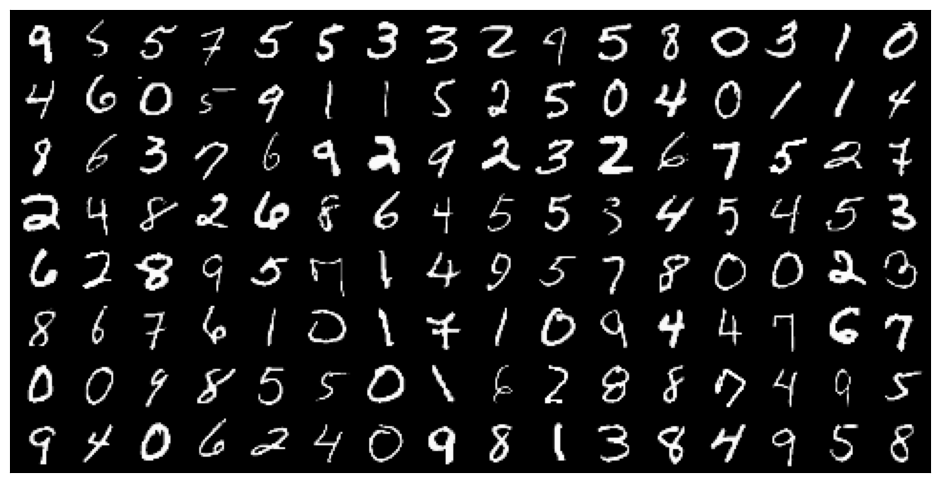

In [ ]:
show_batch(val_dl)

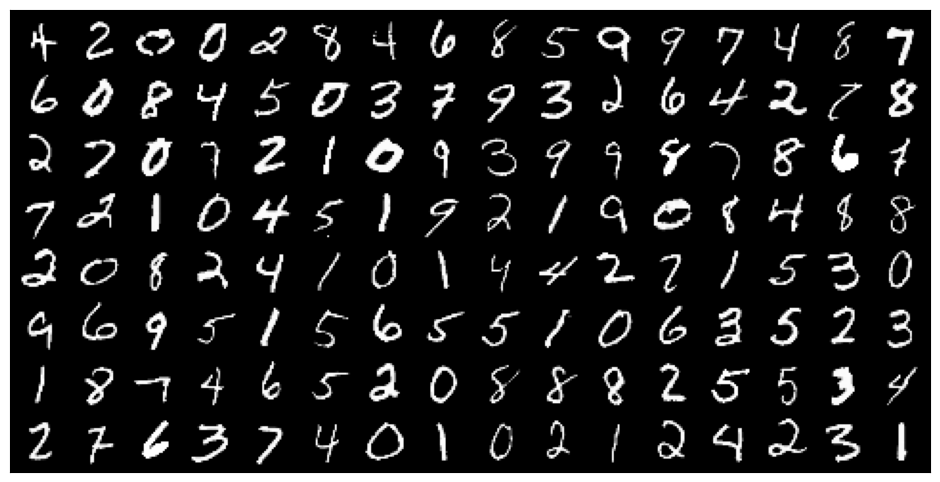

In [ ]:
show_batch(train_dl)

A proporção de imagens de cada classe entre os datasets de treino e validação separadas pelo comando `random_split` não é exata, porém é bem proxima, o que não é capaz de causar inregularidades nos desempenhos de treinamento para o nosso caso.

Através da função `show_batch` Também podemos ver a distribuição de valores em cada batch. Como ativamos o parametro `Shuffle` para o dataset de treino, sempre vamos obter diferentes conjuntos de batchs ao rodarmos o código. O mesmo não irá acontecer com o conjunto de validação.

--------------------------------------------------------------------------------

The proportion of images of each class between the train and validation dataset divided by `random_split` command is not exact but is very close, which is not capable of causing irregularities in the train performance for us.

Using the `show_batch` function we can also see the value distribution in each batch. How do we activate the `shuffle` parameter for the train dataset, we always get different sets of batchs when we load the code. The same will not happen with the validation set.


# Criando modelos

Creating models

Para nossa tarefa de classificação de imagens vamos fazer uso de redes neurais convolucionais, ao quais apresentam vários parâmentros possíveis de serem modificados. Entre ele temos:

- Número de camadas convolucionais
- Tamanho do kernel
- Padding
- tamanho de camadas lineares
- Número de neurônios em cada camada linear
- Dropout
- batch norm
- Função de ativação

No propósito de aumentar nossas chances em achar um bom conjunto de parâmetros vamos trabalhar com 4 modelos convolucionais diferentes.

--------------------------------------------------------------------------------

For the image classification task, we will make use of convolutional neural networks, which give us several parameters that we can change. Among them we have:

- Number of convolutional layers
- Kernel size
- Padding
- linear layer size
- Number of neurons in each linear layer
- Dropout
- batch norm
- activation function

In order to increase our chances of finding a good set of parameters we will work with 4 different convolutional models.

In [ ]:
#VGG with 4 convolutions
#ativation function: ReLU
#regualization: Dropout
class model1(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_layer = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = (3,3)), # 16 x 26 x 26
        nn.BatchNorm2d(16),
        nn.ReLU(),

        nn.Conv2d(16, 32, kernel_size = (3,3)), # 32 x 24 x 24
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 16 x 12 X 12


        nn.Conv2d(32, 64, kernel_size = (3,3)), # 64 x 10 X 10
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(64,128, kernel_size =(3,3)), # 128 x 8 X 8
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 4 X 4
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(128*4*4, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(1024, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)


In [ ]:
#VGG with 4 convolutions
#ativation function: ReLU
#regualization: Dropout
class model2(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_layer = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = (3,3), padding = 1), # 16 x 28 x 28
        nn.BatchNorm2d(16),
        nn.ReLU(),
        #
        nn.Conv2d(16, 32, kernel_size = (3,3), padding = 1), # 32 x 28 x 28
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 16 x 14 X 14


        nn.Conv2d(32, 64, kernel_size = (3,3), padding = 1), # 64 x 14 X 14
        nn.BatchNorm2d(64),
        nn.ReLU(),
        #
        nn.Conv2d(64,128, kernel_size =(3,3), padding = 1), # 128 x 14 X 14
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 7 X 7
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),

        nn.Linear(128*7*7, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(1024, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)


In [ ]:
#AlexNet with 2 convolutions
#ativation function: LeakyReLU
#regualization: Dropout
class model3(nn.Module):
    def __init__(self) -> None: # o que significa
        super().__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,32,3,1), #32 x 26 x 26
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(32), # 32 x 13 x 13

            nn.Conv2d(32,64,3,1), # 64 x 11 x 11
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(64), # 64 x 5 x 5
        )
        self.linear_layer = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(64*5*5,128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),

            nn.Dropout(0.3),

            nn.Linear(128,64),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),

            nn.Dropout(0.3),

            nn.Linear(64,10),
            nn.LogSoftmax(dim=1),
        )

    def forward(self,x):
        out = self.conv_layer(x)
        # print(out.shape)
        out = out.view(-1,64*5*5)
        out = self.linear_layer(out)

        return out

In [ ]:
#VGG with 5 convolutions
#ativation function: ReLU
#regualization: Dropout
class model4(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(1,64, kernel_size = (3,3), padding = 1), # 64 x 28 x 28
        nn.ReLU(),
        nn.Conv2d(64,64, kernel_size = (3,3), padding = 1), # 64 x 28 x 28
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 64 x 14 x 14
        nn.BatchNorm2d(64),

        nn.Conv2d(64,128, kernel_size = (3,3), padding = 1), # 128 x 14 x 14
        nn.ReLU(),
        nn.Conv2d(128,128, kernel_size = (3,3), padding = 1), # 128 x 14 x 14
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 7 x 7
        nn.BatchNorm2d(128),

        nn.Conv2d(128,256, kernel_size = (3,3)), # 256 x 5 x 5
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 256 x 2 x 2
        nn.BatchNorm2d(256)
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),

        nn.Linear(256*2*2,512),
        nn.ReLU(),
        nn.Dropout(0.5),

        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)

In [ ]:
#cheking if we are running the code in GPU or CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('rodando na', device)

rodando na cuda


# Criando função de treino e validação

Nosso processo de treinamento é construindo de varias etapas, sendo a primeira a de leitura das imagens pelo modelo, onde ele vai fazer predições e computar a função de custo e em seguida execultar o processo de atualização dos parâmetros.

Esse processo de leitura dos dados e atualização de parâmetros, também conhecida como forward e backward, é feita em ciclos e a cada batch de imagens, que no nosso caso definimos como sendo a cada 128 imagens. A cada época completada passamos nosso modelo por uma função de validação, onde obtemos uma acurrácia para cada época de treinamento. O final de uma época é definida quando nosso modelo lê todos os dados de treinamento disponíveis.

Nós também concatenamos nossa função de treino com uma função de validação, ao qual é ativada ao fim de cada época de treino e nos serve como principal indicador para sabermos se nosso modelo esta aprendendo com um nível de performace desejado.

--------------------------------------------------------------------------------

Our training process consists of several stages, the first being to read the images by the model. Here he will make predictions and compute the loss function and then "do/execute" the parameter update process.

The reading data process and parameter update, also known as forward and backward, is made on cycles and with each image batch, that in our case we define as "being for each" / "every" 128 images. "Every epoch done" we pass our model through a validation function until we get the accuracy for all training epochs. The end of an epoch is defined when our model reads all the train data set available.

We also concatenate our training function with our validation function, which is activated at the end of each training epoch and it help us as our mean indicator for know if our model is learning at a desired performance level.



In [ ]:
def fit(epochs, model, train_dl, val_dl, loss_func, optimizer, decrease):
  #learning rate decreasing in 0.1 at every 6 epochs
  if decrease is True:
    scheduler = StepLR(optimizer, step_size= 6, gamma=0.1)

  history = []
  epoch_info = {'loss_train': 0.0, 'loss_val': 0.0, 'acc': 0.0}

  with tempfile.TemporaryDirectory() as tempdir:
    #creat directory to save parameters
    best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
    torch.save(model.state_dict(), best_model_params_path)
    best_acc = 0.0

    for epoch in range(epochs):
      model.train()        #setting to train mode
      loss_epoch = 0.0
      for imgs, labels in train_dl:
        imgs, labels = imgs.to(device), labels.to(device) #setting imgs and labels in GPU

        out = model(imgs)             #Forward
        loss = loss_func(out, labels)     #loss function computation

        loss.backward()               #Backward
        loss_epoch += loss.item()
        optimizer.step()                  #updating parameters
        optimizer.zero_grad()             #resetting gradients
      print('----------------------------------------')

      if decrease is True:
        scheduler.step()

      epoch_info['loss_val'], epoch_info['acc'] = evaluation(model, val_dl, loss_func)
      epoch_info['loss_train'] = loss_epoch / len(train_dl)

      print('epoch:', epoch,
            'loss_train:', epoch_info['loss_train'],
            'loss_val:', epoch_info['loss_val'],
            'acc:', epoch_info['acc'])

      if best_acc < epoch_info['acc']: #creating checkpoint when your model gets better acc
        print('better')
        best_acc = epoch_info['acc']
        torch.save(model.state_dict(), best_model_params_path)


      history.append([epoch_info['loss_train'], epoch_info['loss_val'], epoch_info['acc']])
    #getting model version with best acc score.
    model.load_state_dict(torch.load(best_model_params_path))
  return history


def evaluation(model, val_dl, loss_func):
  model.eval()  #setting to validation mode

  with torch.no_grad(): #No calculation of gradient in forward step
    loss_val = 0.0
    acc = 0.0

    for imgs, labels in val_dl:
      imgs, labels = imgs.to(device), labels.to(device)

      #Forward
      out = model(imgs)
      loss= loss_func(out, labels)
      loss_val += loss.item()

    #calculating accuracy
      _, preds = torch.max(out, dim = 1)
      acc += torch.sum(preds == labels).item() / len(preds)

    loss_val = loss_val / len(val_dl)
    acc = acc / len(val_dl)

  return loss_val, acc

Nossa função de treino tem sequência de parâmetros que podemos alterar na nossa fase de busca:

- Número de épocas

- Modelo treinado

- Função de custo

- Otimizador

- Decrescimento da taxa de aprendizagem

- Dados de treino e validação

Para o último parâmetro listado, sempre usaremos os mesmos Dataloaders de treino e validação para todos os nossos processos de treinamento, porêm é possivel testar DataLoaders como diferentes proporções para treino e validação e diferentes tamanhos de batch.

Após o modelo chamar nossa função `fit` e completar todas as épocas de treinamento, obtemos uma lista com o historico de valor da função de custo para treino e validação e acurácia. Essas informações são especialmente valiosas para definirmos o desempenho do nosso modelo através de diversas análises.

--------------------------------------------------------------------------------

Our train function has a lot of parameters that we can change:

- Number of epochs

- Loss function

- Optimizer

- Decreasing of learning rate

- training and validation data

For the last listed paramater we will always use the same training and validation dataloaders for all our training process, but it is possible to test dataloaders with different train and val proportions and different batch sizes.

After the model calls our `fit` function and completes all training epochs, we get a list with the loss function value's historical of both training and validation and the accuracy too. This information are especially valuable for defining our model performance through several analysis.


# Criando funções de análise

In [ ]:
def acurracy(model, val_dl, classes):
  correct_preds = {name_class: 0 for name_class in classes}
  all_preds = {name_class: 0 for name_class in classes}

  model.eval()

  with torch.no_grad():
    total_correct = 0.0
    total = 0.0
    for imgs, labels in val_dl:
      imgs, labels = imgs.to(device), labels.to(device)

      out = model(imgs)

      _, preds = torch.max(out, dim = 1)

      for pred, label in zip(preds,labels):
          if pred == label:
            correct_preds[label.item()] += 1
            total_correct += 1
          all_preds[label.item()] += 1
          total += 1

    for name in classes:
      class_acc = correct_preds[name] / all_preds[name]
      print("acurracia da classe", str(name),":", class_acc)

    global_acc = total_correct/total
    print('acurracia global:', global_acc)
  return global_acc

In [ ]:
def make_confusion_matrix(model, val_dl):
  model.eval()
  model.to('cpu')
  Preds = []
  Labels = []
  with torch.no_grad():
    for imgs, labels in val_dl:
      out = model(imgs)

      _, preds = torch.max(out, dim = 1)
      Preds = np.concatenate((Preds, preds))
      Labels = np.concatenate((Labels, labels))

  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=10)
  cm = confmat(torch.tensor(Preds),torch.tensor(Labels))

  plt.title("Confusion Matrix")
  sns.heatmap(cm,annot=True,fmt='d')
  plt.xlabel("Predictions")
  plt.ylabel("Ground Truth")
  plt.show()
  model.to(device)

In [ ]:
def plot_loss(history):
  history = np.array(history)
  loss_train = history[:,0]
  loss_val = history[:,1]

  plt.title('loss model X epoch')
  plt.plot(loss_train, label ="loss train")
  plt.plot(loss_val, label = 'loss validation')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")


def plot_acc(history):
  history = np.array(history)
  acc = history[:, 2]

  plt.title('accuracy X epoch')
  plt.plot(acc, label ="accuracy")
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()



In [ ]:
def plot_all_acc(historical):
  for i, history in enumerate(historical):
    history = np.array(history)
    acc = history[:, 2]

    plt.plot(acc, label = "accuracy"+str(i))
  plt.title('accuracy X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()


def plot_all_loss(historical):
  for i, history in enumerate(historical):
    history = np.array(history)
    loss_train = history[:,0]

    plt.plot(loss_train, label = 'loss train'+str(i))
  plt.title('loss model X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()

  for i, history in enumerate(historical):
      history = np.array(history)
      loss_val = history[:,1]

      plt.plot(loss_val, label ="loss val"+str(i))
  plt.title('loss model X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()


# testando modelos - organizadamente

In [ ]:
#tecnicas já usadas: data argumentation, batch normalize, dropout, VGG

# modelos = [model1, model2, model3]
# regularização = [l2 = [0.0001, 000.2], l1, None]
# optmizadores = [SGD+momentum, Adam]
# decrescimento do lr = [True, false]

Ao lidarmos com o treinamento de redes neurais temos em geral 3 problemas principais:

● Problema 1: geralmente, temos um limite computacional e/ou temporal para
realização de experimentos.

● Problema 2: não temos apenas um hiperparâmetro. Temos que testar
combinações de hiperparâmetros.

● Problema 3: hiperparâmetros interagem entre si de maneira não-linear.

-------------------------------------------------------------------------------

When we deal with the training of neural networks we have generally 3 main problems:

● problem 1: generally we have a computation and/or temporal limit for carrying out experiments.

● problem 1: we don't have just one hyperparameter. We have to test combinations of hyperparameters.

● Problem 3: hyperparameters interact between themselves in a non-linear way.

Dentre os hiperparametros que podemos tunar nessa fase estão:

● Arquitetura da rede

● Taxa de aprendizado

● Decaimento/Escalonador de taxa de aprendizado

● Otimizador

● Regularização (tipo, intensidade)

Decaimento é um tipo de hiperparâmetro que só usaremos mais para a frente. A princípio nosso objetivo inical é encontrar modelos que apresentem bom desempenho com uma taxa de aprendizado fixa. Depois de selecionarmos os melhores modelos podemos implementar decaimento da taxa de aprendizado para que esses modelos possam alcançar melhores resultados.

--------------------------------------------------------------------------------

Among the hyperparameters that we can tune at this stage are:

● Model architecture

● Learning rate

● Learning Rate Decay/Scalier

● Optmizator

● Regularization

Decay is a hyperparamter type that we will just use later on. In principle, our initial goal is to find models that show good performance with a fixed learning rate. After selecting the best models we can deploy decay on the learning rate so that these models can achieve better results.


# Procedimento Completo:

● Etapa 1: Verificar custo inicial

● Etapa 2: Achar taxa de aprendizado que diminui custo

● Etapa 3: Busca ampla, treinar por menos épocas

● Etapa 4: Busca fina, treinar por mais épocas

● Etapa 5: Análisar curvas de treinamento

apesar de eu executar cada etapa apenas uma vez, devemos encarar essas etapas como um ciclo, onde frequentemente vamos voltar etapas com o proposito de aperfeiçoar nossos modelos.

--------------------------------------------------------------------------------
Full procedure:

● Step 1: Check the initial cost

● Step 2: Find the learning rate that reduces cost

● Step 3: Broad search, training few epochs

● Step 4: Fine search, training more epochs

● step 5: Analyze training curves

Although I perform each step only once, we must see this like a cycle, "where we frequently goes back through steps with the purpose of get our models more perfect."


# Etapa 1
Nela é esperado que o custo inical deva ser ln(C), sendo C o número de classes do nosso modelo, já para a acurácia o normal é que dê um valor por volta de 1/C, que é a marca que um modelo totalmente aleatório, sem nenhum treinamento, alcançaria.

--------------------------------------------------------------------------------

Step 1

Here we expect the initial cost to be ln(C), with C the number of classes from our model. To accuracy the expected value is around 1/C, which is the value that a random model, without any training, would achieve.


In [ ]:
lossfunc = nn.CrossEntropyLoss()

model_1 = model1().to(device)
model_2 = model2().to(device)
model_3 = model3().to(device)
model_4 = model4().to(device)

print(evaluation(model_1, val_dl, lossfunc))
print(evaluation(model_2, val_dl, lossfunc))
print(evaluation(model_3, val_dl, lossfunc))
print(evaluation(model_4, val_dl, lossfunc))

(2.303276616334915, 0.0982421875)
(2.303014302253723, 0.1013671875)
(2.305335122346878, 0.0908203125)
(2.3033372104167937, 0.1013671875)


# Etapa 2 e etapa 3

Vamos juntar as duas etapas testanto vários conjuntos de parâmetros diferentes a fim de encontrar uma combinação que melhor se encaixe em cada modelo. Ao todo vamos estar testando 4 conjuntos de parâmetros para cada modelo,  16 combinações diferentes ao todo!

Para questões de comparações escolhi deixar uma configuração padrão de parâmetros para cada um dos 4 modelos.

Step 2 and Step 3

We will bring the two steps together by testing several different groups of parameters with the purpose of finding a combination that best fits in each model. In total we will be testing 4 sets of parameters for each model, 16 combinations in total!

In [ ]:
Model1_0 = model1().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model1_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history1_0 = fit(num_epoch, Model1_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

epoch: 0 loss_train: 0.2421558784513638 loss_val: 0.061666686460375784 acc: 0.9849609375
better
epoch: 1 loss_train: 0.05319837202028982 loss_val: 0.039726244588382545 acc: 0.9880859375
better
epoch: 2 loss_train: 0.028183709900697757 loss_val: 0.03858127911225893 acc: 0.988671875
better
epoch: 3 loss_train: 0.017576708908770874 loss_val: 0.027170152630424126 acc: 0.990625
better
epoch: 4 loss_train: 0.01748094976526396 loss_val: 0.026681774773169308 acc: 0.990625
epoch: 5 loss_train: 0.010461786207903561 loss_val: 0.029254634224344045 acc: 0.9912109375
better
epoch: 6 loss_train: 0.008704705483777898 loss_val: 0.026754026213893667 acc: 0.990625
epoch: 7 loss_train: 0.004365725378136568 loss_val: 0.023816068629093932 acc: 0.9919921875
better


In [ ]:
Model1_1 = model1().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model1_1.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history1_1 = fit(num_epoch, Model1_1, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.10612737670669269 loss_val: 0.05513740715687163 acc: 0.9822265625
better
epoch: 1 loss_train: 0.049266505609105886 loss_val: 0.03775105947352131 acc: 0.987890625
better
epoch: 2 loss_train: 0.030782072299866584 loss_val: 0.038752927157474915 acc: 0.9873046875
epoch: 3 loss_train: 0.025821322254266525 loss_val: 0.04498788548589801 acc: 0.986328125
epoch: 4 loss_train: 0.020973128676494777 loss_val: 0.027472974502597936 acc: 0.9892578125
better
epoch: 5 loss_train: 0.02410967995789994 loss_val: 0.03584525818514521 acc: 0.9892578125
epoch: 6 loss_train: 0.029575175748624165 loss_val: 0.030714307216112503 acc: 0.9908203125
better
epoch: 7 loss_train: 0.018472451556088596 loss_val: 0.02787070816848427 acc: 0.9908203125


In [ ]:
Model1_2 = model1().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.SGD(Model1_2.parameters(), lr = lr, weight_decay = 0.00001, momentum=0.9)

lossfunc = nn.CrossEntropyLoss()


history1_2 = fit(num_epoch, Model1_2, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 1.3755374100701563 loss_val: 0.7635239645838737 acc: 0.89453125
better
epoch: 1 loss_train: 0.6162788458939257 loss_val: 0.44820253551006317 acc: 0.93046875
better
epoch: 2 loss_train: 0.409410874185891 loss_val: 0.3292151726782322 acc: 0.9466796875
better
epoch: 3 loss_train: 0.3134294658899307 loss_val: 0.25277575850486755 acc: 0.95234375
better
epoch: 4 loss_train: 0.2589843738695671 loss_val: 0.21544744558632373 acc: 0.9576171875
better
epoch: 5 loss_train: 0.2215541479916408 loss_val: 0.185704118385911 acc: 0.9646484375
better
epoch: 6 loss_train: 0.19677313717788664 loss_val: 0.1662351157516241 acc: 0.966796875
better
epoch: 7 loss_train: 0.17922737534190047 loss_val: 0.14498254489153622 acc: 0.9701171875
better


In [ ]:
Model1_3 = model1().to(device)
num_epoch = 8
lr = 0.005
opt_func = torch.optim.SGD(Model1_3.parameters(), lr = lr, weight_decay = 0.0001, momentum=0.99)
lossfunc = nn.CrossEntropyLoss()

history1_3 = fit(num_epoch, Model1_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

epoch: 0 loss_train: 0.1910085051617553 loss_val: 0.05772789622133132 acc: 0.984765625
better
epoch: 1 loss_train: 0.062378161906361064 loss_val: 0.03311117291159462 acc: 0.990234375
better
epoch: 2 loss_train: 0.036932508775298 loss_val: 0.029624373684055173 acc: 0.990234375
epoch: 3 loss_train: 0.03663136223080199 loss_val: 0.033186095740529706 acc: 0.990234375
epoch: 4 loss_train: 0.025450641259848108 loss_val: 0.02931304771627765 acc: 0.9904296875
better
epoch: 5 loss_train: 0.019062547035342693 loss_val: 0.023189640745840734 acc: 0.99296875
better
epoch: 6 loss_train: 0.013060766744933188 loss_val: 0.02589496970167602 acc: 0.99140625
epoch: 7 loss_train: 0.010980873940721282 loss_val: 0.026890963703408488 acc: 0.992578125


modelo2

In [ ]:
Model2_0 = model2().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model2_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()

history2_0 = fit(num_epoch, Model2_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------

epoch: 0 loss_train: 0.19704780902970453 loss_val: 0.05719639607705176 acc: 0.985546875
better
epoch: 1 loss_train: 0.045390458954177024 loss_val: 0.04048795886337757 acc: 0.9884765625
better
epoch: 2 loss_train: 0.02021078994128339 loss_val: 0.03228800445795059 acc: 0.9904296875
better
epoch: 3 loss_train: 0.010926777170971036 loss_val: 0.028583269228693097 acc: 0.991015625
better
epoch: 4 loss_train: 0.006586655472999374 loss_val: 0.02885458374512382 acc: 0.9900390625
epoch: 5 loss_train: 0.00387919802210647 loss_val: 0.026909771995269692 acc: 0.9904296875
epoch: 6 loss_train: 0.0031977361003900397 loss_val: 0.035110554652055724 acc: 0.9896484375
epoch: 7 loss_train: 0.009067925402958846 loss_val: 0.02874997837061528 acc: 0.9916015625
better


In [ ]:
Model2_1 = model2().to(device)
num_epoch = 8
lr = 0.0005
opt_func = torch.optim.Adam(Model2_1.parameters(), lr = lr, weight_decay = 0.00005)
lossfunc = nn.CrossEntropyLoss()


history2_1 = fit(num_epoch, Model2_1, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.10570693804464977 loss_val: 0.04696813267655671 acc: 0.98515625
better
epoch: 1 loss_train: 0.03383182107735875 loss_val: 0.04590890451800078 acc: 0.98671875
better
epoch: 2 loss_train: 0.026016999906378572 loss_val: 0.02935666644552839 acc: 0.98828125
better
epoch: 3 loss_train: 0.017925152614720743 loss_val: 0.02561584131763084 acc: 0.99140625
better
epoch: 4 loss_train: 0.01718707569906938 loss_val: 0.040883867238881065 acc: 0.987890625
epoch: 5 loss_train: 0.011757945183239043 loss_val: 0.028038781522627686 acc: 0.9900390625
epoch: 6 loss_train: 0.01587057234438393 loss_val: 0.03221876364259515 acc: 0.990234375
epoch: 7 loss_train: 0.008719125239214667 loss_val: 0.023939523071749135 acc: 0.992578125
better


In [ ]:
Model2_2 = model2().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model2_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

epoch: 0 loss_train: 0.10412472784519196 loss_val: 0.05455284470226616 acc: 0.981640625
better
epoch: 1 loss_train: 0.04630014804464861 loss_val: 0.036637641553534196 acc: 0.9892578125
better
epoch: 2 loss_train: 0.03411514586929617 loss_val: 0.031139959569554777 acc: 0.989453125
better
epoch: 3 loss_train: 0.030276591768327716 loss_val: 0.025200584575213725 acc: 0.9912109375
better
epoch: 4 loss_train: 0.01963987187663061 loss_val: 0.022592793717922176 acc: 0.9935546875
better
epoch: 5 loss_train: 0.018136971008036573 loss_val: 0.03194477193173952 acc: 0.9892578125
epoch: 6 loss_train: 0.018404938154432376 loss_val: 0.03191079208918381 acc: 0.9919921875
epoch: 7 loss_train: 0.02393217198620952 loss_val: 0.026637094669695216 acc: 0.991796875


In [ ]:
Model2_3 = model2().to(device)
num_epoch = 8
lr = 0.01
opt_func = torch.optim.SGD(Model2_3.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

epoch: 0 loss_train: 0.15291472169217366 loss_val: 0.0479236860293895 acc: 0.985546875
better
epoch: 1 loss_train: 0.04145738638873244 loss_val: 0.03236101696966216 acc: 0.9904296875
better
epoch: 2 loss_train: 0.02315007604674661 loss_val: 0.0290634318604134 acc: 0.991015625
better
epoch: 3 loss_train: 0.015540227044678839 loss_val: 0.025022987289412414 acc: 0.9921875
better
epoch: 4 loss_train: 0.011347815957209417 loss_val: 0.10724516781046986 acc: 0.965625
epoch: 5 loss_train: 0.013463248086065568 loss_val: 0.030397445900598542 acc: 0.9896484375
epoch: 6 loss_train: 0.008827293372777259 loss_val: 0.025458061284734868 acc: 0.99140625
epoch: 7 loss_train: 0.0049334961198398775 loss_val: 0.021705464550177567 acc: 0.9927734375
better


model3

In [ ]:
Model3_0 = model3().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model3_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history3_0 = fit(num_epoch, Model3_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------

epoch: 0 loss_train: 0.8791087128992738 loss_val: 0.3308548789471388 acc: 0.9591796875
better
epoch: 1 loss_train: 0.33779034748159603 loss_val: 0.16979852560907602 acc: 0.9724609375
better
epoch: 2 loss_train: 0.20782200244480165 loss_val: 0.11041806312277913 acc: 0.978125
better
epoch: 3 loss_train: 0.14839533973356772 loss_val: 0.08174061011523008 acc: 0.9822265625
better
epoch: 4 loss_train: 0.11693192627923242 loss_val: 0.06277128960937262 acc: 0.9857421875
better
epoch: 5 loss_train: 0.09494657474088258 loss_val: 0.05337479044683278 acc: 0.985546875
epoch: 6 loss_train: 0.08052087955433747 loss_val: 0.0461540098534897 acc: 0.98671875
better
epoch: 7 loss_train: 0.06791142311332554 loss_val: 0.043173913517966865 acc: 0.9875
better


In [ ]:
Model3_1 = model3().to(device)
num_epoch = 6
lr = 0.000015
opt_func = torch.optim.Adam(Model3_1.parameters(), lr = lr,  weight_decay = 0.000001)
lossfunc = nn.CrossEntropyLoss()


history3_1 = fit(num_epoch, Model3_1, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 1.7258516669273376 loss_val: 1.0991330295801163 acc: 0.8416015625
better
epoch: 1 loss_train: 1.1011943406072155 loss_val: 0.7857663363218308 acc: 0.908984375
better
epoch: 2 loss_train: 0.8648892073795713 loss_val: 0.6188181564211845 acc: 0.9234375
better
epoch: 3 loss_train: 0.7186291624759805 loss_val: 0.5128230892121792 acc: 0.940234375
better
epoch: 4 loss_train: 0.6139188444819944 loss_val: 0.4426558390259743 acc: 0.948828125
better
epoch: 5 loss_train: 0.5308606372825031 loss_val: 0.38111990988254546 acc: 0.953515625
better
epoch: 6 loss_train: 0.46864529611735506 loss_val: 0.32313117757439613 acc: 0.9607421875
better
epoch: 7 loss_train: 0.412661313496787 loss_val: 0.2786239441484213 acc: 0.9623046875
better


In [ ]:
Model3_2 = model3().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model3_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history3_2 = fit(num_epoch, Model3_2, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.8935787701401218 loss_val: 0.34595365151762963 acc: 0.953125
better
epoch: 1 loss_train: 0.34583309796349754 loss_val: 0.16976632066071035 acc: 0.973828125
better
epoch: 2 loss_train: 0.21023069198789268 loss_val: 0.11119759567081929 acc: 0.9796875
better
epoch: 3 loss_train: 0.14938621459336116 loss_val: 0.07955534560605884 acc: 0.982421875
better
epoch: 4 loss_train: 0.11327325826318099 loss_val: 0.06395718189887703 acc: 0.9849609375
better
epoch: 5 loss_train: 0.09314614044951981 loss_val: 0.05163142997771501 acc: 0.9865234375
better
epoch: 6 loss_train: 0.07895283980359291 loss_val: 0.046516337106004356 acc: 0.9875
better
epoch: 7 loss_train: 0.06795589028504388 loss_val: 0.04164041061885655 acc: 0.9873046875


In [ ]:
Model3_3 = model3().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.SGD(Model3_3.parameters(), lr = lr, weight_decay = 0.00001,  momentum=0.95)
lossfunc = nn.CrossEntropyLoss()


history3_3 = fit(num_epoch, Model3_3, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.5689334303654473 loss_val: 0.132034595310688 acc: 0.9705078125
better
epoch: 1 loss_train: 0.1681385973918027 loss_val: 0.07702358476817608 acc: 0.97890625
better
epoch: 2 loss_train: 0.11842488275262816 loss_val: 0.05978355905972421 acc: 0.984765625
better
epoch: 3 loss_train: 0.0941595571003212 loss_val: 0.050542998127639294 acc: 0.9861328125
better
epoch: 4 loss_train: 0.07928363024417696 loss_val: 0.04659415988717228 acc: 0.9857421875
epoch: 5 loss_train: 0.07203898662058958 loss_val: 0.041963694733567536 acc: 0.9849609375
epoch: 6 loss_train: 0.06206071031568893 loss_val: 0.037140013271709904 acc: 0.987890625
better
epoch: 7 loss_train: 0.059493133351849074 loss_val: 0.0361003078869544 acc: 0.9869140625


modelo4

In [ ]:
Model4_0 = model4().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model4_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_0 = fit(num_epoch, Model4_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

epoch: 0 loss_train: 0.27082394639287016 loss_val: 0.050357451848685744 acc: 0.9861328125
better
epoch: 1 loss_train: 0.04340786907886123 loss_val: 0.03360719094052911 acc: 0.9908203125
better
epoch: 2 loss_train: 0.024118363349056194 loss_val: 0.027512388648756315 acc: 0.9912109375
better
epoch: 3 loss_train: 0.01644760323286956 loss_val: 0.023252004248206504 acc: 0.9921875
better
epoch: 4 loss_train: 0.00838728310472075 loss_val: 0.024563464071252383 acc: 0.9908203125
epoch: 5 loss_train: 0.005352331600392815 loss_val: 0.02310059396768338 acc: 0.992578125
better
epoch: 6 loss_train: 0.0038324489429841973 loss_val: 0.020375280822918285 acc: 0.99296875
better
epoch: 7 loss_train: 0.001963886012652375 loss_val: 0.020678023011714685 acc: 0.9927734375


In [ ]:
Model4_1 = model4().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.SGD(Model4_1.parameters(), lr = lr, weight_decay = 0.00001,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history4_1 = fit(num_epoch, Model4_1, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.6651136202031168 loss_val: 0.17288495041429996 acc: 0.969140625
better
epoch: 1 loss_train: 0.14879394953363928 loss_val: 0.09271893566474318 acc: 0.97890625
better
epoch: 2 loss_train: 0.09630719041130666 loss_val: 0.06860355017706751 acc: 0.982421875
better
epoch: 3 loss_train: 0.0733376000783053 loss_val: 0.056038406561128795 acc: 0.9853515625
better
epoch: 4 loss_train: 0.06105272891321059 loss_val: 0.0483381190802902 acc: 0.985546875
better
epoch: 5 loss_train: 0.05285989913190233 loss_val: 0.045629443530924615 acc: 0.9865234375
better
epoch: 6 loss_train: 0.04556576349483482 loss_val: 0.0393943635514006 acc: 0.98828125
better
epoch: 7 loss_train: 0.03965353662597722 loss_val: 0.03697294100420549 acc: 0.9888671875
better


In [ ]:
Model4_2 = model4().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model4_2.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_2 = fit(num_epoch, Model4_2, train_dl, val_dl, lossfunc, opt_func, False)

epoch: 0 loss_train: 0.11651653171043265 loss_val: 0.044792327370669224 acc: 0.98671875
better
epoch: 1 loss_train: 0.04528906454476688 loss_val: 0.047751984815113245 acc: 0.9859375
epoch: 2 loss_train: 0.03857406904411117 loss_val: 0.045155820337095066 acc: 0.987890625
better
epoch: 3 loss_train: 0.023570462155601428 loss_val: 0.049918522252119145 acc: 0.9853515625
epoch: 4 loss_train: 0.021643842254406048 loss_val: 0.04379348904467406 acc: 0.9892578125
better
epoch: 5 loss_train: 0.020367258548654277 loss_val: 0.03475809696428769 acc: 0.990234375
better
epoch: 6 loss_train: 0.025260920329837344 loss_val: 0.03571219651421416 acc: 0.9908203125
better
epoch: 7 loss_train: 0.016694983170061184 loss_val: 0.047438495230380795 acc: 0.9892578125


In [ ]:
Model4_3 = model4().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model4_3.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history4_3 = fit(num_epoch, Model4_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

epoch: 0 loss_train: 0.25899710184412783 loss_val: 0.051622616872191426 acc: 0.9849609375
better
epoch: 1 loss_train: 0.042154301322418555 loss_val: 0.04039418105967343 acc: 0.988671875
better
epoch: 2 loss_train: 0.02498924519770361 loss_val: 0.029704875353490933 acc: 0.9900390625
better
epoch: 3 loss_train: 0.014949381185278039 loss_val: 0.027282424424993224 acc: 0.9912109375
better
epoch: 4 loss_train: 0.014735229957672158 loss_val: 0.02371789518510923 acc: 0.993359375
better
epoch: 5 loss_train: 0.006048316820042914 loss_val: 0.022909483639523387 acc: 0.99296875
epoch: 6 loss_train: 0.003377420442271175 loss_val: 0.023725968660073704 acc: 0.992578125
epoch: 7 loss_train: 0.002689020394985885 loss_val: 0.022367358677729498 acc: 0.991796875


Pegamos 2 versões para cada modelo, com excessão do modelo 3 que nos entregou valores de acurácia muito abaixo dos modelos comparados.

# Etapa 4: treinando por mais épocas

In [ ]:
Model1_0 = model1().to(device)
num_epoch = 20
lr = 0.0001

opt_func = torch.optim.Adam(Model1_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history1_0 = fit(num_epoch, Model1_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

melhor
epoch: 0 loss_train: 0.23629347421228886 loss_val: 0.06403989098034799 acc: 0.9833984375
melhor
epoch: 1 loss_train: 0.055165503170855085 loss_val: 0.04566540962550789 acc: 0.9875
melhor
epoch: 2 loss_train: 0.030785109398180042 loss_val: 0.030076548026409 acc: 0.991015625
epoch: 3 loss_train: 0.018181915104324962 loss_val: 0.02849405895685777 acc: 0.991015625
melhor
epoch: 4 loss_train: 0.014977883125237864 loss_val: 0.022028739654342645 acc: 0.9931640625
epoch: 5 loss_train: 0.012321131847846997 loss_val: 0.027142728096805513 acc: 0.99140625
melhor
epoch: 6 loss_train: 0.00531662624160727 loss_val: 0.01997075849212706 acc: 0.994140625
epoch: 7 loss_train: 0.003411047292094485 loss_val: 0.022655402593954932 acc: 0.9927734375
epoch: 8 loss_train: 0.002380046113956206 loss_val: 0.019405727941193617 acc: 0.9927734375
epoch: 9 loss_train: 0.0020706095530025276 loss_val: 0.021692233607609523 acc: 0.9927734375
epoch: 10 loss_train: 0.001933722064583482 loss_val: 0.02461869824473979 a

In [ ]:
Model1_3 = model1().to(device)
num_epoch = 20
lr = 0.005
opt_func = torch.optim.SGD(Model1_3.parameters(), lr = lr, weight_decay = 0.0001, momentum=0.99)
lossfunc = nn.CrossEntropyLoss()

history1_3 = fit(num_epoch, Model1_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

melhor
epoch: 0 loss_train: 0.19598355271436016 loss_val: 0.06236907966376748 acc: 0.9822265625
melhor
epoch: 1 loss_train: 0.05756879568236462 loss_val: 0.0293019267017371 acc: 0.9904296875
epoch: 2 loss_train: 0.0374508755137052 loss_val: 0.02973136141372379 acc: 0.98984375
melhor
epoch: 3 loss_train: 0.027324834513349522 loss_val: 0.019744913242175244 acc: 0.994140625
epoch: 4 loss_train: 0.02233232474376062 loss_val: 0.02251807884822483 acc: 0.9939453125
epoch: 5 loss_train: 0.027126196755853017 loss_val: 0.02055383512388289 acc: 0.99296875
epoch: 6 loss_train: 0.014864684221563573 loss_val: 0.018315875438565853 acc: 0.99375
melhor
epoch: 7 loss_train: 0.009660362838948113 loss_val: 0.014820940239405899 acc: 0.995703125
epoch: 8 loss_train: 0.007201386040080628 loss_val: 0.017383191341286873 acc: 0.99453125
epoch: 9 loss_train: 0.006273646632777447 loss_val: 0.013771675693715225 acc: 0.9955078125
melhor
epoch: 10 loss_train: 0.004579225827885615 loss_val: 0.013445330922331777 acc: 

In [ ]:
Model2_2 = model2().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model2_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

melhor
epoch: 0 loss_train: 0.1039047042325396 loss_val: 0.04747441312065348 acc: 0.9849609375
melhor
epoch: 1 loss_train: 0.049127101936730845 loss_val: 0.04573844991391525 acc: 0.98515625
melhor
epoch: 2 loss_train: 0.03808784216465749 loss_val: 0.02699822963331826 acc: 0.9908203125
epoch: 3 loss_train: 0.025640007844676488 loss_val: 0.028696126796421594 acc: 0.9900390625
melhor
epoch: 4 loss_train: 0.01757559506724396 loss_val: 0.02371069024084136 acc: 0.9919921875
melhor
epoch: 5 loss_train: 0.014658342470748126 loss_val: 0.018922141021539572 acc: 0.99375
epoch: 6 loss_train: 0.01447369085137074 loss_val: 0.026824530150042845 acc: 0.991796875
melhor
epoch: 7 loss_train: 0.016539922607350082 loss_val: 0.0179181123705348 acc: 0.994140625
epoch: 8 loss_train: 0.010682127848749274 loss_val: 0.029595087229608907 acc: 0.991796875
epoch: 9 loss_train: 0.019702056213282047 loss_val: 0.026170049025677145 acc: 0.9923828125
epoch: 10 loss_train: 0.012521534295278955 loss_val: 0.02094903542056

In [ ]:
Model2_3 = model2().to(device)
num_epoch = 20
lr = 0.01
opt_func = torch.optim.SGD(Model2_3.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

melhor
epoch: 0 loss_train: 0.15151172838462837 loss_val: 0.04911927566863596 acc: 0.985546875
melhor
epoch: 1 loss_train: 0.04085581985559186 loss_val: 0.04496427057310939 acc: 0.986328125
melhor
epoch: 2 loss_train: 0.03132211256627764 loss_val: 0.0328342197346501 acc: 0.9904296875
melhor
epoch: 3 loss_train: 0.0216486147058935 loss_val: 0.02532152842031792 acc: 0.992578125
melhor
epoch: 4 loss_train: 0.020156628958848788 loss_val: 0.020536781873670407 acc: 0.99453125
epoch: 5 loss_train: 0.015408095148600767 loss_val: 0.03912202510982752 acc: 0.9845703125
epoch: 6 loss_train: 0.01802628036620545 loss_val: 0.02973209338961169 acc: 0.9888671875
epoch: 7 loss_train: 0.012494570343626728 loss_val: 0.024666096933651717 acc: 0.9919921875
epoch: 8 loss_train: 0.007584487254618956 loss_val: 0.016507329649175517 acc: 0.9943359375
epoch: 9 loss_train: 0.010419703128843986 loss_val: 0.05926318124402315 acc: 0.9802734375
epoch: 10 loss_train: 0.016949476954800174 loss_val: 0.027378208498703316 

In [ ]:
Model4_0 = model4().to(device)
num_epoch = 20
lr = 0.0001
opt_func = torch.optim.Adam(Model4_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_0 = fit(num_epoch, Model4_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

melhor
epoch: 0 loss_train: 0.27281173159015076 loss_val: 0.049733931012451646 acc: 0.9865234375
melhor
epoch: 1 loss_train: 0.045584886127697496 loss_val: 0.03138220286928117 acc: 0.988671875
melhor
epoch: 2 loss_train: 0.02537514881857125 loss_val: 0.026064461772330107 acc: 0.9919921875
epoch: 3 loss_train: 0.01599737955739015 loss_val: 0.02409829290700145 acc: 0.991796875
epoch: 4 loss_train: 0.00912611140259381 loss_val: 0.024170918103482108 acc: 0.9916015625
melhor
epoch: 5 loss_train: 0.005212088452314894 loss_val: 0.022925174214469733 acc: 0.992578125
melhor
epoch: 6 loss_train: 0.004891294365596219 loss_val: 0.02016142671018315 acc: 0.99375
melhor
epoch: 7 loss_train: 0.007698677009943038 loss_val: 0.019652166295418282 acc: 0.9939453125
epoch: 8 loss_train: 0.003206921031333281 loss_val: 0.020688814522509348 acc: 0.99375
epoch: 9 loss_train: 0.0038371827045670342 loss_val: 0.022625639465013593 acc: 0.9931640625
epoch: 10 loss_train: 0.011007856071930668 loss_val: 0.026104591576

In [ ]:
Model4_3 = model4().to(device)
num_epoch = 20
lr = 0.0001
opt_func = torch.optim.Adam(Model4_3.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history4_3 = fit(num_epoch, Model4_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

melhor
epoch: 0 loss_train: 0.27414357563930336 loss_val: 0.058866668748669325 acc: 0.983203125
melhor
epoch: 1 loss_train: 0.04739878165439285 loss_val: 0.029157066787593066 acc: 0.9923828125
epoch: 2 loss_train: 0.02584258002742868 loss_val: 0.02400989793241024 acc: 0.9923828125
melhor
epoch: 3 loss_train: 0.016183001003910562 loss_val: 0.02356516222062055 acc: 0.9927734375
melhor
epoch: 4 loss_train: 0.009772558720653942 loss_val: 0.019594467550632544 acc: 0.9931640625
epoch: 5 loss_train: 0.006349035825907526 loss_val: 0.020175176656630357 acc: 0.9931640625
melhor
epoch: 6 loss_train: 0.004941780564820811 loss_val: 0.019003413486643694 acc: 0.993359375
epoch: 7 loss_train: 0.004186571262835059 loss_val: 0.024217331205727534 acc: 0.9921875
melhor
epoch: 8 loss_train: 0.004413463507080451 loss_val: 0.018526124616619198 acc: 0.99375
melhor
epoch: 9 loss_train: 0.003935684409024643 loss_val: 0.018914958324603503 acc: 0.994140625
epoch: 10 loss_train: 0.002000966603347855 loss_val: 0.02

Agora que já treinamos e conferimos nossa acurácia para diferentes modelos, vamos implementar decaimento, na esperança que nosso modelo possa melhorar a acurácia diminuindo a função de custo.

--------------------------------------------------------------------------------

Now that we already have trained and checked the acuracy for different models, we will implement decay, in the hope that our model can improve accuracy by decreasing the loss function.

# Etapa 4: implementando decaimento

In [ ]:
Model1_0 = model1().to(device)
num_epoch = 20
lr = 0.0001
opt_func = torch.optim.Adam(Model1_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()

history1_0 = fit(num_epoch, Model1_0, train_dl, val_dl, lossfunc, opt_func, True)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.23072561607535544 loss_val: 0.06591157638467848 acc: 0.98359375
better
----------------------------------------
epoch: 1 loss_train: 0.04950614220880229 loss_val: 0.03708767853677273 acc: 0.9900390625
better
----------------------------------------
epoch: 2 loss_train: 0.02816069116334206 loss_val: 0.028434034978272394 acc: 0.9919921875
better
----------------------------------------
epoch: 3 loss_train: 0.016886432826968615 loss_val: 0.02698113273945637 acc: 0.99140625
----------------------------------------
epoch: 4 loss_train: 0.009946010823779066 loss_val: 0.02372588238795288 acc: 0.9921875
better
----------------------------------------
epoch: 5 loss_train: 0.008573214009259667 loss_val: 0.02232988286705222 acc: 0.9931640625
better
----------------------------------------
epoch: 6 loss_train: 0.012799909616146108 loss_val: 0.02626477657322539 acc: 0.9919921875
----------------------------------------
epoch: 7 loss_tr

In [ ]:
Model1_3 = model1().to(device)
num_epoch = 20
lr = 0.005
opt_func = torch.optim.SGD(Model1_3.parameters(), lr = lr, weight_decay = 0.0001, momentum=0.99)
lossfunc = nn.CrossEntropyLoss()

history1_3 = fit(num_epoch, Model1_3, train_dl, val_dl, lossfunc, opt_func, True)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.18799003897363256 loss_val: 0.038780092904926275 acc: 0.9876953125
better
----------------------------------------
epoch: 1 loss_train: 0.047905741938678865 loss_val: 0.034650030950524525 acc: 0.988671875
better
----------------------------------------
epoch: 2 loss_train: 0.0335475980733714 loss_val: 0.027639506745981635 acc: 0.991015625
better
----------------------------------------
epoch: 3 loss_train: 0.03775150706541949 loss_val: 0.020608762523625045 acc: 0.993359375
better
----------------------------------------
epoch: 4 loss_train: 0.03769503890482532 loss_val: 0.01979059177538147 acc: 0.9935546875
better
----------------------------------------
epoch: 5 loss_train: 0.029665652555935406 loss_val: 0.021471313782967627 acc: 0.99375
better
----------------------------------------
epoch: 6 loss_train: 0.017957785042556774 loss_val: 0.020061392100251395 acc: 0.994140625
better
----------------------------------------
e

In [ ]:
Model2_2 = model2().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model2_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2, train_dl, val_dl, lossfunc, opt_func, True)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.10456171303280982 loss_val: 0.037403426691889764 acc: 0.98828125
better
----------------------------------------
epoch: 1 loss_train: 0.04910921304133432 loss_val: 0.04885713295516325 acc: 0.984375
----------------------------------------
epoch: 2 loss_train: 0.038009524505569374 loss_val: 0.02499147211201489 acc: 0.9921875
better
----------------------------------------
epoch: 3 loss_train: 0.021887736163174347 loss_val: 0.024056775961071253 acc: 0.991796875
----------------------------------------
epoch: 4 loss_train: 0.01965199168490503 loss_val: 0.017265684362791946 acc: 0.9953125
better
----------------------------------------
epoch: 5 loss_train: 0.020307777395194942 loss_val: 0.03439451044541784 acc: 0.98984375
----------------------------------------
epoch: 6 loss_train: 0.024522409065233158 loss_val: 0.023173670395772207 acc: 0.9908203125
----------------------------------------
epoch: 7 loss_train: 0.010572964387

In [ ]:
Model2_3 = model2().to(device)
num_epoch = 20
lr = 0.01
opt_func = torch.optim.SGD(Model2_3.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3, train_dl, val_dl, lossfunc, opt_func, True)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.15449772908769804 loss_val: 0.04633893051650375 acc: 0.9861328125
better
----------------------------------------
epoch: 1 loss_train: 0.03948870019280705 loss_val: 0.029906415723962708 acc: 0.990625
better
----------------------------------------
epoch: 2 loss_train: 0.022516604724886088 loss_val: 0.02888240211759694 acc: 0.991796875
better
----------------------------------------
epoch: 3 loss_train: 0.01775644603426215 loss_val: 0.02210949342115782 acc: 0.9921875
better
----------------------------------------
epoch: 4 loss_train: 0.013630056362358275 loss_val: 0.02176999120565597 acc: 0.9923828125
better
----------------------------------------
epoch: 5 loss_train: 0.015351380677974045 loss_val: 0.01799784890608862 acc: 0.9935546875
better
----------------------------------------
epoch: 6 loss_train: 0.007335278054635072 loss_val: 0.018420043725927825 acc: 0.9931640625
----------------------------------------
epoch: 7 

In [ ]:
Model4_0 = model4().to(device)
num_epoch = 20
lr = 0.0001
opt_func = torch.optim.Adam(Model4_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_0 = fit(num_epoch, Model4_0, train_dl, val_dl, lossfunc, opt_func, True)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.2768440938024814 loss_val: 0.04926368455635384 acc: 0.986328125
better
----------------------------------------
epoch: 1 loss_train: 0.044517000715633664 loss_val: 0.029481669134111144 acc: 0.991796875
better
----------------------------------------
epoch: 2 loss_train: 0.024868507405486087 loss_val: 0.026134302213904448 acc: 0.9912109375
----------------------------------------
epoch: 3 loss_train: 0.01483224702252332 loss_val: 0.02064690597471781 acc: 0.993359375
better
----------------------------------------
epoch: 4 loss_train: 0.008911316720206805 loss_val: 0.018204740957298782 acc: 0.9947265625
better
----------------------------------------
epoch: 5 loss_train: 0.005161135426947269 loss_val: 0.022571838704425317 acc: 0.9921875
----------------------------------------
epoch: 6 loss_train: 0.004517292285012884 loss_val: 0.02409404565623845 acc: 0.9916015625
----------------------------------------
epoch: 7 loss_train

In [ ]:
Model4_3 = model4().to(device)
num_epoch = 20
lr = 0.0001
opt_func = torch.optim.Adam(Model4_3.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history4_3 = fit(num_epoch, Model4_3, train_dl, val_dl, lossfunc, opt_func, True)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.26311771491670916 loss_val: 0.05331878708675504 acc: 0.98515625
better
----------------------------------------
epoch: 1 loss_train: 0.04388701304761243 loss_val: 0.038173566351179036 acc: 0.987890625
better
----------------------------------------
epoch: 2 loss_train: 0.025223567694072323 loss_val: 0.026581512932898475 acc: 0.9912109375
better
----------------------------------------
epoch: 3 loss_train: 0.016497826104750857 loss_val: 0.022464643529383467 acc: 0.99140625
better
----------------------------------------
epoch: 4 loss_train: 0.009758039113487407 loss_val: 0.022862824818002992 acc: 0.991796875
better
----------------------------------------
epoch: 5 loss_train: 0.006835497205209886 loss_val: 0.020582106056826886 acc: 0.99375
better
----------------------------------------
epoch: 6 loss_train: 0.003737270090215165 loss_val: 0.01957234216424695 acc: 0.9923828125
----------------------------------------
epoch: 7

# Etapa 5: olhar curvas de treinamento

Nessa etapa podemos analisar vário problemas como a qualidade de inicalização do nosso modelo. Podemos observar que em todos os 6 modelos selecionados a função de custo cai vertiginosamente no começo. Isso é um indicio de boa inicalização de taxa de aprendizado. Em seguida vemos que a função de custo se estabiliza. Alguns pontos tem uma leve queda da função de custos, que são provavelmente pelo decaimento da taxa de aprendizagem.

--------------------------------------------------------------------------------

At this step we can analyze several problems such as the initialization quality of our model. We can observe at all the 6 select models the lost function "strongly fall down in the beginning". This is an indication of good learning rate initialization. We then can see that the loss function stabilizes. Some points have a slight drop in the cost function, that is probably caused by the decay of learning rate.



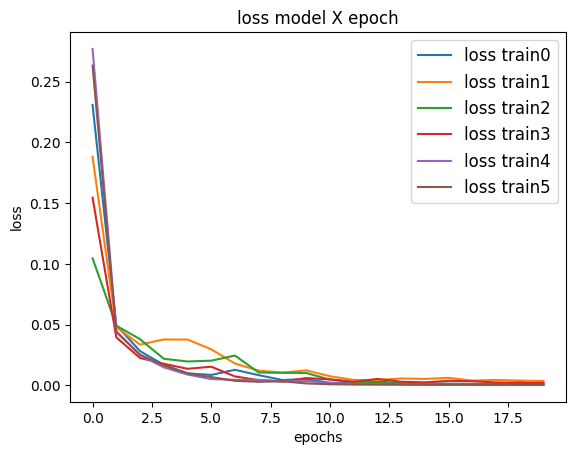

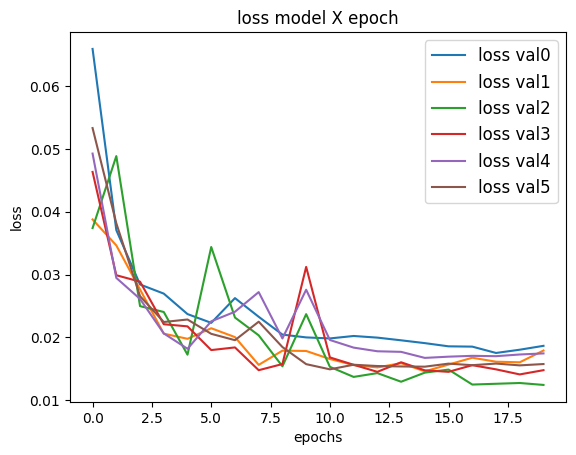

In [ ]:
historical = [history1_0, history1_3 ,history2_2, history2_3, history4_0, history4_3]

plot_all_loss(historical)

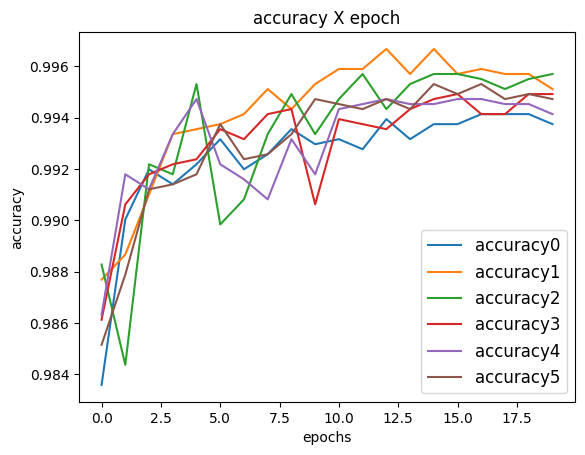

In [ ]:
plot_all_acc(historical)

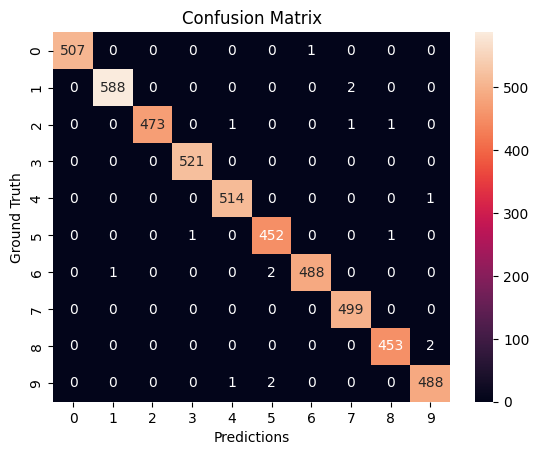

In [ ]:
#matrix de confusão
make_confusion_matrix(Model1_3, val_dl)

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
acurracy(Model1_3, val_dl, classes)

acurracia da classe 0 : 0.9980314960629921
acurracia da classe 1 : 0.9966101694915255
acurracia da classe 2 : 0.9936974789915967
acurracia da classe 3 : 1.0
acurracia da classe 4 : 0.9980582524271845
acurracia da classe 5 : 0.9955947136563876
acurracia da classe 6 : 0.9938900203665988
acurracia da classe 7 : 1.0
acurracia da classe 8 : 0.9956043956043956
acurracia da classe 9 : 0.9938900203665988
acurracia global: 0.9966


0.9966

# assembling

Podemos também usar vários modelos diferentes para nos dar uma única previsão.

--------------------------------------------------------------------------------

We can also make use of several different models to give us a single prediction.

In [ ]:
models = [Model1_3, Model2_2, Model2_3, Model4_0]

from statistics import multimode

def assembing(models, val_data, classes):
  #construindo vetor de predições
  predictions = []
  cont = 0
  Label = torch.tensor([])
  for model in models:

    Pred_model = torch.tensor([])
    model.eval()
    with torch.no_grad():
      for imgs, labels in val_data:
        if cont == 0:
          Label = torch.cat((Label, labels))

        imgs, labels = imgs.to(device), labels.to(device)

        out = model(imgs)
        _, preds = torch.max(out, dim = 1)

        Pred_model = torch.cat((Pred_model, preds.to('cpu')))
    cont+=1

    predictions.append(np.array(Pred_model))
  predictions = np.transpose(predictions)
  resposta = []

  for i in predictions:
     moda = multimode(i)
     #Em casos de empates, sempre pegar o primeiro valor da lista
     resposta.append(moda[0])


  correct_preds = {name_class: 0 for name_class in classes}
  all_preds = {name_class: 0 for name_class in classes}
  total_correct = 0.0
  total = 0.0

  for pred, label in zip(resposta,Label):

    if pred == label:
      correct_preds[classes[int(label)]] += 1
      total_correct += 1
    all_preds[classes[int(label)]] += 1
    total += 1

  for name in classes:
    class_acc = correct_preds[name] / all_preds[name]
    print("acurracia da classe", str(name),":", class_acc)

  global_acc = total_correct/total
  print('acurracia global:', global_acc)

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
acurracy(Model1_3, val_dl, classes)
assembing(models, val_dl,classes)

acurracia da classe 0 : 0.9980314960629921
acurracia da classe 1 : 0.9966101694915255
acurracia da classe 2 : 0.9936974789915967
acurracia da classe 3 : 1.0
acurracia da classe 4 : 0.9980582524271845
acurracia da classe 5 : 0.9955947136563876
acurracia da classe 6 : 0.9938900203665988
acurracia da classe 7 : 1.0
acurracia da classe 8 : 0.9956043956043956
acurracia da classe 9 : 0.9938900203665988
acurracia global: 0.9966
acurracia da classe 0 : 0.9960629921259843
acurracia da classe 1 : 0.9966101694915255
acurracia da classe 2 : 0.9936974789915967
acurracia da classe 3 : 1.0
acurracia da classe 4 : 0.9980582524271845
acurracia da classe 5 : 0.9955947136563876
acurracia da classe 6 : 0.9938900203665988
acurracia da classe 7 : 0.9979959919839679
acurracia da classe 8 : 0.9978021978021978
acurracia da classe 9 : 0.9938900203665988
acurracia global: 0.9964


# Salvando resultados

-------------------------------------------

Saiving results

In [ ]:
import csv

submission = [['ImageId','Label']]
def saving_test(model, test_dl):
  index = 1
  with torch.no_grad():
    for imgs in test_dl:
      imgs = imgs.to(device)
      out = model(imgs)

      _, preds = torch.max(out, dim = 1)
      for pred in preds:
        submission.append([index, pred.item()])
        index +=1

  with open('submission.csv', 'w') as submissionFile:
      writer = csv.writer(submissionFile)
      writer.writerows(submission)

  print('Submission Complete!')

In [ ]:
saving_test(Model4_2, test_dl)

Submission Complete!


# salvando modelo

--------------------------------------------

Saiving best model

In [ ]:
name_model = 'MNIST_model'
def saving_model(model, name_model):
  torch.save(model.state_dict(), name_model+'.pth')

saving_model(Model4_2, 'melhor_modelo')

In [ ]:
modelo = model_CNN().to(device)
modelo.load_state_dict(torch.load( 'best_model'+'.pth'))

<All keys matched successfully>

In [ ]:
acurracy(Model, test_loader, lossfunc, classes)

acurracia da classe 0 : 0.9948979591836735
acurracia da classe 1 : 0.9991189427312775
acurracia da classe 2 : 0.9951550387596899
acurracia da classe 3 : 0.994059405940594
acurracia da classe 4 : 0.9979633401221996
acurracia da classe 5 : 0.9943946188340808
acurracia da classe 6 : 0.9874739039665971
acurracia da classe 7 : 0.9961089494163424
acurracia da classe 8 : 0.9928131416837782
acurracia da classe 9 : 0.9910802775024777
acurracia global: 0.9944


0.9944

In [ ]:
acurracy(modelo, test_loader, lossfunc, classes)

acurracia da classe 0 : 0.996938775510204
acurracia da classe 1 : 0.9911894273127754
acurracia da classe 2 : 0.997093023255814
acurracia da classe 3 : 1.0
acurracia da classe 4 : 0.9979633401221996
acurracia da classe 5 : 0.984304932735426
acurracia da classe 6 : 0.9832985386221295
acurracia da classe 7 : 0.9834630350194552
acurracia da classe 8 : 0.9928131416837782
acurracia da classe 9 : 0.9801783944499505
acurracia global: 0.9908


0.9908